# ***MACHINE LEARNING***

## *ÍNDICE:* 
---
0. INTRODUCCIÓN
1. ANÁLISIS EXPLORATORIO DE DATOS (EDA)
    - 1.1. Acondicionamiento bases de datos
    - 1.2. Análisis visual
    - 1.3. Análisis estadístico  
2. **MACHINE LEARNING**
    - [2.1. Preparación y limpieza de datos](#21)
    - [2.2. Feature Engineering](#22)
    - [2.3. Modelado](#23)
3. RESULTADOS
    - 3.1. Visualización y reporting de los resultados
    - 3.2. Creación de un pipeline para el flujo automatizado
---

##  **2.1. Preparación de datos**<a id='21'></a>

In [34]:
!pip install xgboost

In [37]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection  import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt


In [5]:
df_train=pd.read_csv(r'C:\Users\mareg\OneDrive\Documentos\TheBridge_Enero\Machine_Learning\test\Proyecto_Final\Proyecto_ML_Entrega\scr\data\processed\adults_cleaned_encoded3.csv')
df_train.head()

,capital-gain,capital-loss,hours-per-week,age,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,class_>50K
0,2174,0,40,39,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,0,0,13,50,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,40,38,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,40,53,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,40,28,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Definir los datos de entrenamiento y la variable objetivo
X = df_train.drop(columns=['class_>50K'])  # DataFrame sin la columna objetivo 'class'
y = df_train['class_>50K']  # Serie con la columna objetivo 'class'

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
print("Total features shape:", X.shape)
print("Train features shape:", X_train.shape)
print("Train target shape:", y_train.shape)
print("Test features shape:", X_test.shape)
print("Test target shape:", y_test.shape)

Total features shape: (32537, 88)
Train features shape: (26029, 88)
Train target shape: (26029,)
Test features shape: (6508, 88)
Test target shape: (6508,)


In [9]:
X

,capital-gain,capital-loss,hours-per-week,age,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,2174,0,40,39,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0,0,13,50,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,40,38,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,40,53,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,40,28,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,0,0,38,27,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32533,0,0,40,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32534,0,0,40,58,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32535,0,0,20,22,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


##  **2.2. Feature Engineering**<a id='22'></a>

<Axes: xlabel='class_>50K', ylabel='count'>

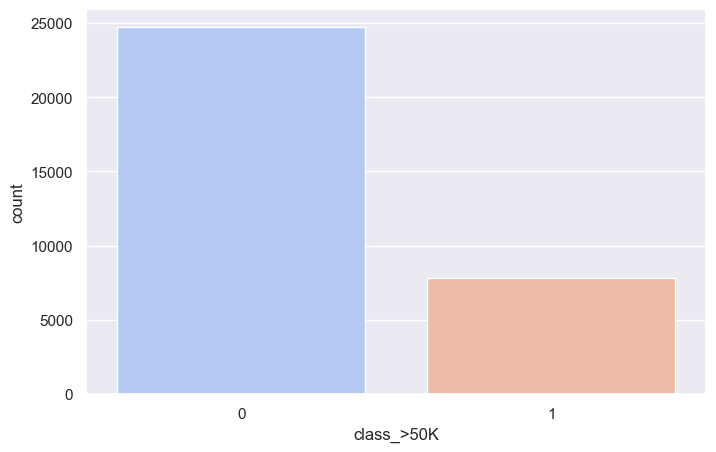

In [15]:
sns.set(rc={'figure.figsize':(8, 5)})
sns.countplot(x=y,data=df_train,palette="coolwarm")

**Observaciones:**

- Dataset desbalanceado

**Propuestas:**

Al tener un dataset desbalanceado se buscan una serie de opciones, en este caso, suponiendo que no se puedan obtener más datos que equilibren nuestro dataset se plantean las siguientes opciones.
- Opciones para *balancear la data*:

    - Oversampling.
    - Undersampling.
    - Métodos mixtos.



En este notebook se pretende tratar los datos para mejorar los modelos que se han comprobado mejores en el notebook anterior `ML_BaselineX.ipynb`. 

Se crean dos dataset procesados:
1. Se seleccionan las variables indepedientes más influyentes mediante los métodos no supervisado de **PCA** y **RFE**.
2. Se balancean las variables utilizando el método de resampling: 
Planteamiento: balanceado aleatorio, algoritmo ROSE y algoritmo SMOTE.


    2.1. Oversampling : **SMOTE**

    2.2. Combinación de under y oversampling: **SMOTEENN**
    
    2.3. Selección del método que se considere mejor.

***Features selection:***

---

In [ ]:
from sklearn.preprocessing import StandardScaler

In [20]:
selector = RFE(DecisionTreeClassifier(), n_features_to_select=10, step=1)
selector = selector.fit(X_train, y_train)

In [21]:
selector.support_

array([ True,  True,  True,  True, False, False,  True, False, False,
       False, False, False, False, False, False,  True, False,  True,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

In [22]:
selector.ranking_

array([ 1,  1,  1,  1, 10, 71,  1, 11,  8, 15, 69, 19,  9, 20, 13,  1, 27,
        1,  3, 43,  1, 35, 24, 30, 28, 73,  1,  6, 26, 29, 16, 22, 67,  4,
       25,  7, 21, 18, 17, 37, 31, 32, 12, 23, 14, 39,  1,  5, 34, 49, 62,
       38, 66, 70, 72, 45, 57, 33, 51, 58, 65, 74, 75, 76, 59, 47, 53, 79,
       44, 46, 42, 64, 41, 78, 77, 60, 36, 55, 63, 50, 68, 40, 56, 61, 54,
        2, 52, 48])

In [26]:
 # definido y ajustado el objeto selector RFE
selected_features = X_train.columns[selector.support_]
selected_features

Index(['capital-gain', 'capital-loss', 'hours-per-week', 'age',
       'workclass_Private', 'education_Primary-school',
       'education_Secondary-school', 'marital-status_Married-civ-spouse',
       'occupation_Craft-repair', 'race_White'],
      dtype='object')

Sorprende que entre ellas esten Primary School y Secondary school

In [27]:
selector.n_features_to_select

10

In [31]:
df_fselected = df_train.loc[:,selector.get_feature_names_out()]
df_fselected['class_>50K'] = df_train['class_>50K']
#df_fselected.to_csv(os.getcwd()+'/data/processed/data_featureselected2.csv') # Guardar dataframe con features seleccionadas
df_fselected.head()

,capital-gain,capital-loss,hours-per-week,age,workclass_Private,education_Primary-school,education_Secondary-school,marital-status_Married-civ-spouse,occupation_Craft-repair,race_White,class_>50K
0,2174,0,40,39,0,0,0,0,0,1,0
1,0,0,13,50,0,0,0,1,0,1,0
2,0,0,40,38,1,0,1,0,0,1,0
3,0,0,40,53,1,0,1,1,0,0,0
4,0,0,40,28,1,0,0,1,0,0,0


Optimal number of features : 52


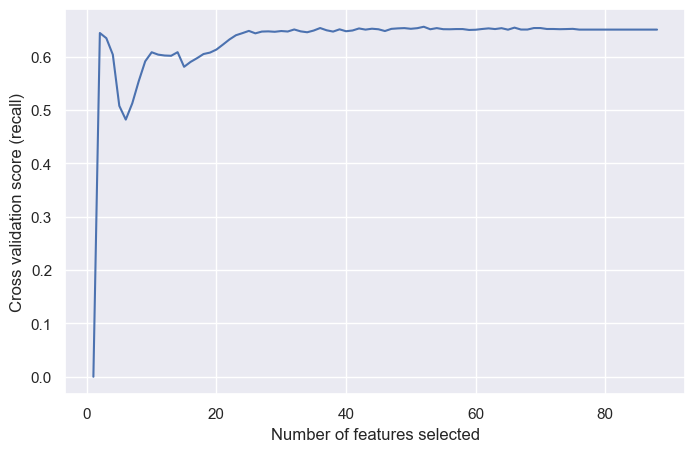

In [41]:

xgboost = XGBClassifier()

min_features_to_select = 1  # Numero minimo de features seleccionadas
rfecv = RFECV(
    estimator=xgboost,
    step=1,
    scoring="recall",
    min_features_to_select=min_features_to_select,
    cv=5  # Numero de particiones
)
rfecv.fit(df_train.drop(columns=['class_>50K']), df_train['class_>50K'])

print("Optimal number of features : %d" % rfecv.n_features_)

# Grafica recall de las particiones
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (recall)")
plt.plot(
    range(min_features_to_select, len(rfecv.cv_results_["mean_test_score"]) + min_features_to_select),
    rfecv.cv_results_["mean_test_score"]
)
plt.show()


***Balancing data:***

---

*`Dataset completo (sin feature selection)`*


In [25]:
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

In [26]:

pipe = make_pipeline(StandardScaler(), XGBClassifier())
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1265
           1       0.72      0.44      0.55       335

    accuracy                           0.85      1600
   macro avg       0.79      0.70      0.73      1600
weighted avg       0.84      0.85      0.83      1600



In [27]:
pipe = make_pipeline(StandardScaler(), XGBClassifier())
pipe.fit(X_train_SMOTE,y_train_SMOTE)
y_pred = pipe.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1265
           1       0.55      0.60      0.57       335

    accuracy                           0.81      1600
   macro avg       0.72      0.73      0.73      1600
weighted avg       0.82      0.81      0.82      1600



In [28]:
pipe = make_pipeline(StandardScaler(), XGBClassifier())
pipe.fit(X_train_SMOTEENN,y_train_SMOTEENN)
y_pred = pipe.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1265
           1       0.48      0.56      0.52       335

    accuracy                           0.78      1600
   macro avg       0.68      0.70      0.69      1600
weighted avg       0.80      0.78      0.79      1600



*`Dataset después del feature selection (7 variables independientes)`*

In [30]:
data_FS = df_fselected.copy()

X_FS = data_FS.drop([target], axis=1)

y_FS = data_FS[target].copy()

X_train_FS, X_test_FS, y_train_FS, y_test_FS = train_test_split(X_FS, y_FS, test_size = 0.2, random_state = 77)

In [31]:
print('Before OverSampling, the shape of train_X: {}'.format(X_train_FS.shape)) 
print('Before OverSampling, the shape of train_y: {} \n'.format(y_train_FS.shape)) 

Before OverSampling, the shape of train_X: (5120, 7)
Before OverSampling, the shape of train_y: (5120,) 



<Axes: ylabel='count'>

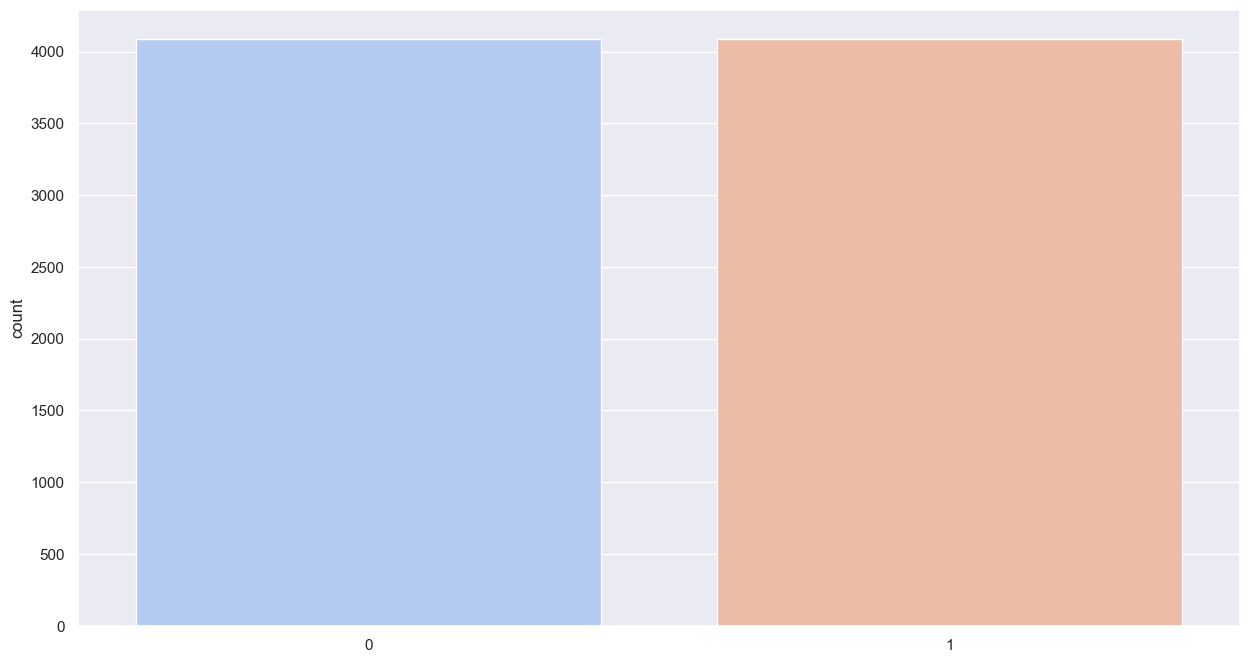

In [32]:
# Apply Oversampling
sm = SMOTE(random_state = 77) 
X_train_FSSMOTE, y_train_FSSMOTE = sm.fit_resample(X_train_FS, y_train_FS.ravel()) 

sns.countplot(x=y_train_FSSMOTE,palette='coolwarm')

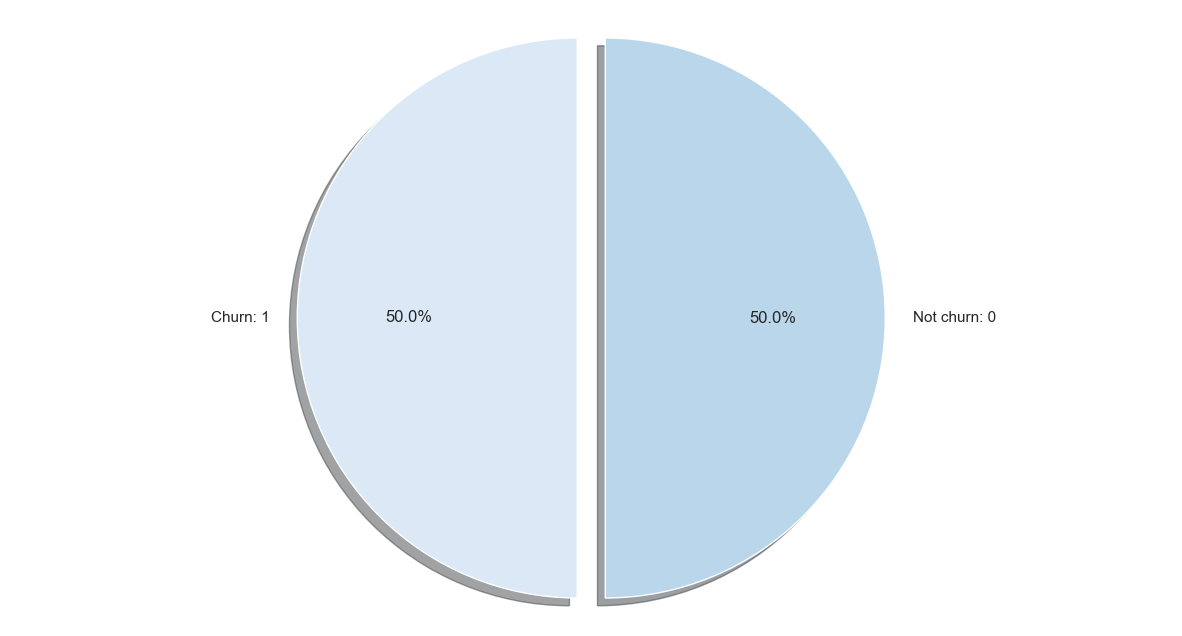

In [33]:
sns.set(rc={'figure.figsize':(15, 8)})
colors = sns.color_palette("Blues")

labels = ['Churn: 1','Not churn: 0']
sizes =  [y_train_FSSMOTE.sum(),len(y_train_FSSMOTE)-y_train_FSSMOTE.sum()]
explode = (0, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels,colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.show()

In [34]:
# Apply Combining
sm = SMOTEENN(random_state = 77) 
X_train_FSSMOTEENN, y_train_FSSMOTEENN = sm.fit_resample(X_train_FS, y_train_FS.ravel()) 

<Axes: ylabel='count'>

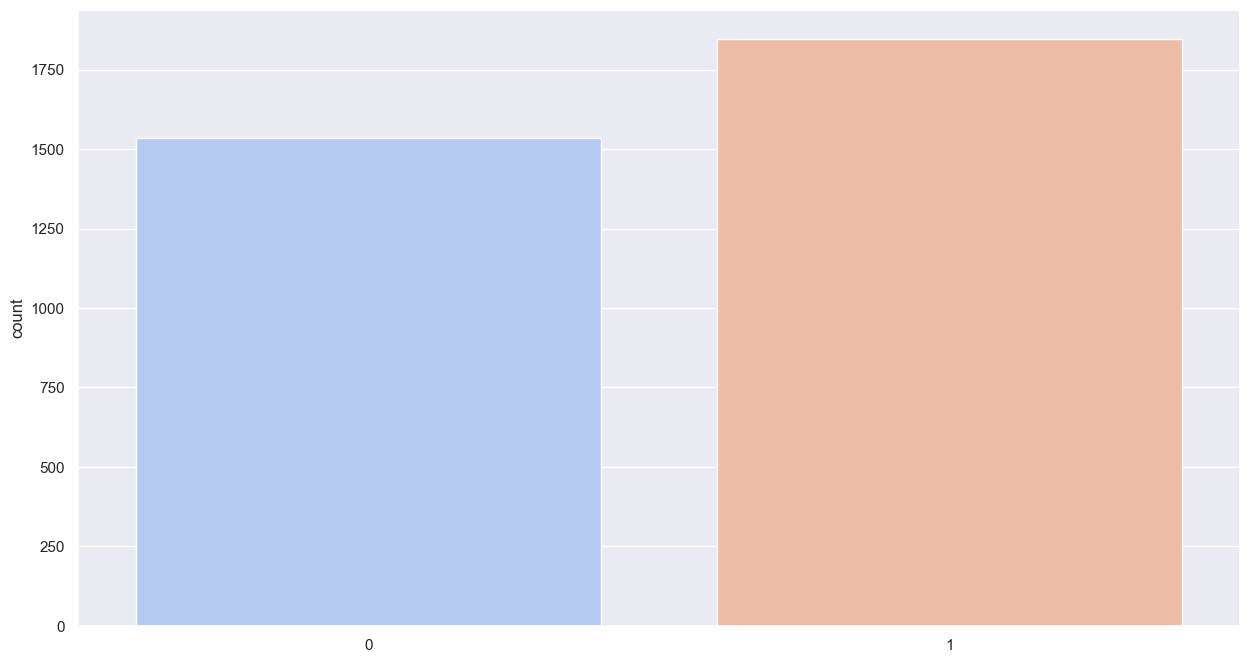

In [35]:
sns.countplot(x=y_train_FSSMOTEENN,palette='coolwarm')

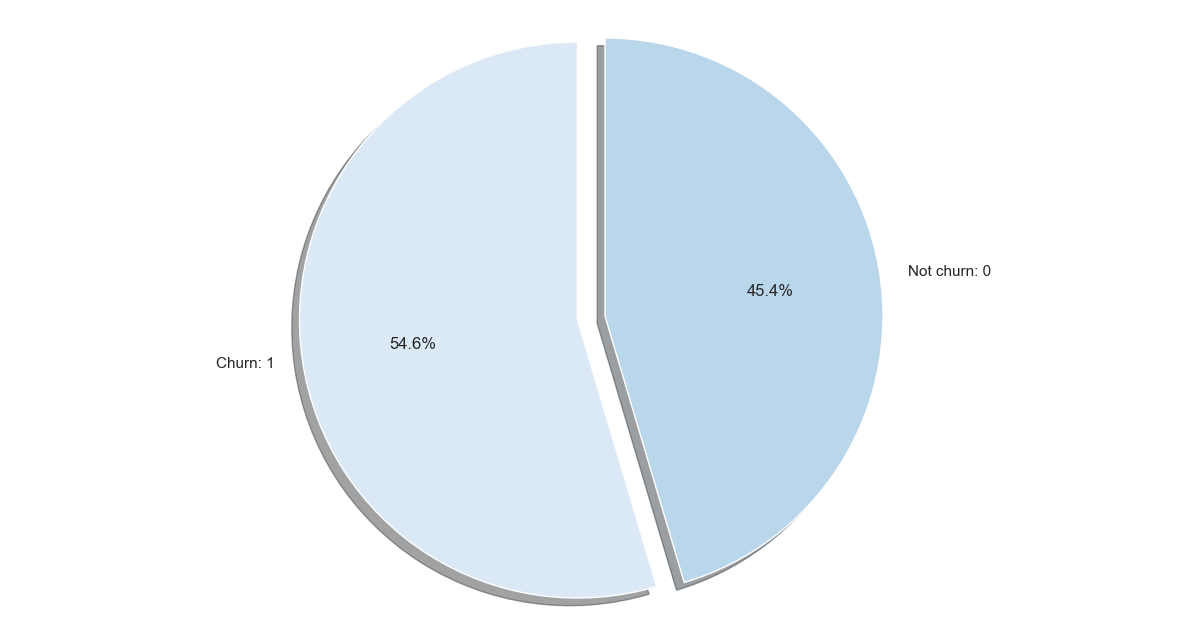

In [36]:
sns.set(rc={'figure.figsize':(15, 8)})
colors = sns.color_palette("Blues")

labels = ['Churn: 1','Not churn: 0']
sizes =  [y_train_FSSMOTEENN.sum(),len(y_train_FSSMOTEENN)-y_train_FSSMOTEENN.sum()]
explode = (0, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels,colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.show()

In [37]:

pipe = make_pipeline(StandardScaler(), XGBClassifier())
pipe.fit(X_train_FS,y_train_FS)
y_pred = pipe.predict(X_test_FS)
print(classification_report(y_test_FS, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1011
           1       0.71      0.46      0.56       269

    accuracy                           0.85      1280
   macro avg       0.79      0.71      0.73      1280
weighted avg       0.84      0.85      0.83      1280



In [38]:
pipe = make_pipeline(StandardScaler(), XGBClassifier())
pipe.fit(X_train_FSSMOTE,y_train_FSSMOTE)
y_pred = pipe.predict(X_test_FS)
print(classification_report(y_test_FS, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87      1011
           1       0.51      0.64      0.57       269

    accuracy                           0.80      1280
   macro avg       0.70      0.74      0.72      1280
weighted avg       0.82      0.80      0.80      1280



In [39]:
pipe = make_pipeline(StandardScaler(), XGBClassifier())
pipe.fit(X_train_FSSMOTEENN,y_train_FSSMOTEENN)
y_pred = pipe.predict(X_test_FS)
print(classification_report(y_test_FS, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84      1011
           1       0.45      0.61      0.52       269

    accuracy                           0.76      1280
   macro avg       0.67      0.71      0.68      1280
weighted avg       0.79      0.76      0.77      1280



**Observaciones:**

Se puede ver que utilizando como prueba el modelo XGBoostClassifier() las mejores métricas están entre: 

- Dataset balanceado SMOTE con feature selection: mejores métricas de modo general. 
- Dataset balanceado con SMOTE sin la feature selection: mejor recall, sin embargo disminuyen las otras métricas

**Propuesta:**

- Prueba con ajuste de hiperparámetros para confirmar los datos obtenidos de la prueba general.


##  **2.3. Modelado**<a id='23'></a>

## Baseline con feature selection data:

Se realiza la `prueba general de modelos` para ver cual de ellos tiene las mejores métricas ***habiendo realizado feature selection***. Aún sin aplicarle el balanceo ni el ajuste de parámetros.

In [35]:
modelos = choose_models('all',None,clf = True)

for modelo in list(modelos.keys()):
    y_pred, metrics, model = baseline(X_train_FS,y_train_FS, X_test_FS, y_test_FS, base_model = modelos[modelo], clf = True,file_name='baseline_fs_metrics.csv')
    

Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved


In [42]:
saved_metrics = pd.read_csv('model/model_metrics/baseline_fs_metrics.csv',sep=';').sort_values(by='Recall',ascending=False)
saved_metrics

,model,ACC,Precision,Recall,F1,ROC,Jaccard
3,DecisionTreeClassifier,0.777344,0.47183098591549294,0.498141,0.484629,0.674887,0.319809
4,RandomForestClassifier,0.860938,0.7898089171974523,0.460967,0.582160,0.714163,0.410596
9,XGBClassifier,0.847656,0.7126436781609196,0.460967,0.559819,0.705755,0.388715
6,AdaBoostClassifier,0.844531,0.6988636363636364,0.457249,0.552809,0.702413,0.381988
7,GradientBoostingClassifier,0.858594,0.7784810126582279,0.457249,0.576112,0.711315,0.404605
10,VotingClassifier,0.856250,0.7672955974842768,0.453532,0.570093,0.708467,0.398693
5,BaggingClassifier,0.837500,0.6783625730994152,0.431227,0.527273,0.688413,0.358025
11,LinearDiscriminantAnalysis,0.812500,0.6593406593406593,0.223048,0.333333,0.596193,0.200000
2,KNeighborsClassifier,0.767188,0.3253012048192771,0.100372,0.153409,0.522491,0.083077
0,LogisticRegression,0.792188,0.5348837209302325,0.085502,0.147436,0.532860,0.079585


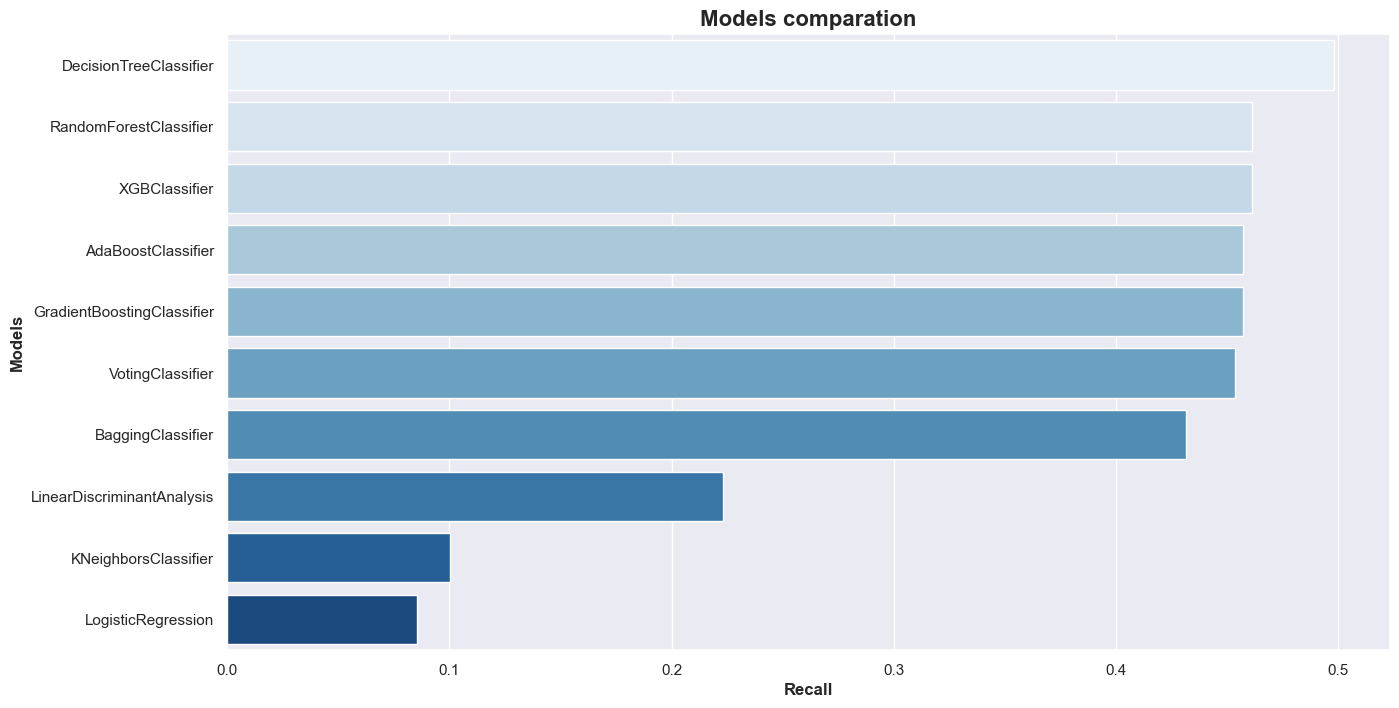

In [45]:
models_comparation(saved_metrics)

## Ajuste de hiperparámetros:

Con este apartado se pretende `mejorar estimadores` realizando el ***ajuste de hiperparámetros***.  

Se seleccionan los cuatro estimadores que han ido liderando la tabla de métricas y se realiza de nuevo su modelado buscando aquellos parámetros que puedan optimizar el modelo.

- En primer, lugar se ajustan los hiperparámetros utilizando el dataset al que se le ha realizado el feature selection.
- Se ajusta los hiperparámetros con el dataset al que se le ha realizado feature selection y balanceo SMOTE.
- Se ajustan los hiperparámetros con el dataset completo y el balanceo aplicado sobre el mismo con el método SMOTE.

In [46]:
mods = ['DTC', 'XGBC','GBC'] # Nota: no se usa el RandomForest por tiempo

for mod in mods:    
    models_generator(X_train_FS, y_train_FS, X_test_FS, y_test_FS,choose_models(mod,params=None),choose_params(mod),
    file_name='fs_metrics.csv',dir_file='model/model_metrics',dir_model_file='model',scaling=False,
    scoring = { "AUC": "roc_auc","Accuracy": make_scorer(accuracy_score), "Recall": make_scorer(recall_score)}, balancing = False)

Model DecisionTreeClassifier saved
<class 'list'>
Saved
fs_metrics.csv saved
Model XGBClassifier saved
Saved
fs_metrics.csv saved
Model GradientBoostingClassifier saved
Saved
fs_metrics.csv saved


In [47]:
saved_fs_metrics = pd.read_csv('model/model_metrics/fs_metrics.csv',sep=';').sort_values(by='Recall',ascending=False)
saved_fs_metrics

,model,params_tried,best_params,ACC,Precision,Recall,F1,ROC,Jaccard,model_path
0,DecisionTreeClassifier,"{'criterion': ['log_loss', 'gini', 'entropy'],...","{'class_weight': 'balanced', 'criterion': 'ent...",0.742969,0.421875,0.602230,0.496172,0.691323,0.329939,model/DecisionTreeClassifier_1.pkl
2,GradientBoostingClassifier,"[{'learning_rate': [0.1, 0.05, 0.01, 0.001], '...","{'criterion': 'friedman_mse', 'learning_rate':...",0.791406,0.503876,0.483271,0.493359,0.678332,0.327456,model/GradientBoostingClassifier.pkl
1,XGBClassifier,"{'nthread': [4], 'objective': ['binary:logisti...","{'colsample_bytree': 1.0, 'learning_rate': 0.0...",0.858594,0.761905,0.475836,0.585812,0.718136,0.414239,model/XGBClassifier.pkl


In [48]:
mods = ['DTC', 'XGBC'] # Nota: no se usa el RandomForest por tiempo

for mod in mods:    
    models_generator(X_train_FSSMOTE, y_train_FSSMOTE, X_test_FS, y_test_FS,choose_models(mod,params=None),choose_params(mod),
    file_name='fs_balanced_metrics.csv',dir_file='model/model_metrics',dir_model_file='model',scaling=False,
    scoring = { "AUC": "roc_auc","Accuracy": make_scorer(accuracy_score), "Recall": make_scorer(recall_score)}, balancing = False)

Model DecisionTreeClassifier saved
<class 'list'>
Saved
fs_balanced_metrics.csv saved
Model XGBClassifier saved
Saved
fs_balanced_metrics.csv saved


In [49]:
saved_fs_balanced_metrics = pd.read_csv('model/model_metrics/fs_balanced_metrics.csv',sep=';').sort_values(by='Recall',ascending=False)
saved_fs_balanced_metrics

,model,params_tried,best_params,ACC,Precision,Recall,F1,ROC,Jaccard,model_path
0,DecisionTreeClassifier,"{'criterion': ['log_loss', 'gini', 'entropy'],...","{'class_weight': 'balanced', 'criterion': 'gin...",0.757031,0.449275,0.691450,0.544656,0.732965,0.374245,model/DecisionTreeClassifier_2.pkl
1,XGBClassifier,"{'nthread': [4], 'objective': ['binary:logisti...","{'colsample_bytree': 1.0, 'learning_rate': 0.0...",0.794531,0.508475,0.669145,0.577849,0.748519,0.406321,model/XGBClassifier_1.pkl


In [52]:
mods = ['DTC','XGBC']

for mod in mods:    
    models_generator(X_train_SMOTE, y_train_SMOTE, X_val, y_val,choose_models(mod,params=None),choose_params(mod),
    file_name='metrics_balanced.csv',dir_file='model/model_metrics',dir_model_file='model',scaling = True,
    scoring = { "Accuracy": make_scorer(accuracy_score),"Recall": make_scorer(recall_score)}, balancing = True)

Model DecisionTreeClassifier saved
<class 'list'>
Saved
metrics_balanced.csv saved
Model XGBClassifier saved
Saved
metrics_balanced.csv saved


In [53]:
saved_balanced_metrics = pd.read_csv('model/model_metrics/metrics_balanced.csv',sep=';').sort_values(by='Recall',ascending=False)
saved_balanced_metrics

,model,params_tried,best_params,ACC,Precision,Recall,F1,ROC,Jaccard,model_path
1,XGBClassifier,"{'nthread': [4], 'objective': ['binary:logisti...","{'colsample_bytree': 0.6, 'learning_rate': 0.0...",0.79375,0.505721,0.659701,0.572539,0.744475,0.401089,model/XGBClassifier_2.pkl
0,DecisionTreeClassifier,"{'criterion': ['log_loss', 'gini', 'entropy'],...","{'class_weight': 'balanced', 'criterion': 'gin...",0.75375,0.437367,0.614925,0.511166,0.702720,0.343333,model/DecisionTreeClassifier_3.pkl


## Prueba con Perceptrón:

Se realiza una comprobación de la `posibilidad de usar una red neuronal`, como el perceptrón, para resolver este problema de clasificación.

In [ ]:
y_pred,metricas,estimator = baseline(X_train, y_train, X_val, y_val, base_model = MLPClassifier(), clf = True,file_name='DL_metrics.csv')

In [ ]:
y_pred,metricas,estimator = baseline(X_train_FS, y_train_FS, X_test_FS, y_test_FS, base_model = MLPClassifier(), clf = True,file_name='DL_metrics.csv')

In [16]:
mlp_metrics = pd.read_csv('model/model_metrics/DL_metrics.csv',sep=';').sort_values(by='Recall',ascending=False)
mlp_metrics

,model,features,ACC,Precision,Recall,F1,ROC,Jaccard
0,MLPClassifier,all,0.946875,0.788732,0.670659,0.724919,0.824862,0.568528
1,MLPClassifier,selected,0.920000,0.719101,0.383234,0.500000,0.682894,0.333333


Con esta prueba **`no`** se obtienen **`resultados`** *comparativamente* **`mejores`** que con los modelos anteriormente probados. 

Se ajustan los hiperparámetros como última prueba:

In [ ]:
params_mlp = {
    'activation': ['relu','logistic'],
    'early_stopping': [True],
    'hidden_layer_sizes': [(128,32,2)],
    'learning_rate': ['constant','invscaling','adaptive'],
    'learning_rate_init': [0.001,0.0005],
    'max_iter': [200,100],
 }

models_generator(df,target,MLPClassifier(),params_mlp,
file_name ='DL_metrics_hyp.csv',dir_file='model/model_metrics',dir_model_file='model',scaling=False,
scoring = { "AUC": "roc_auc","Accuracy": make_scorer(accuracy_score),'Precision': make_scorer(precision_score)})

In [15]:
mlp_metrics_hyparameters = pd.read_csv('model/model_metrics/DL_metrics_hyp.csv',sep=';').sort_values(by='Recall',ascending=False)
mlp_metrics_hyparameters

,model,params_tried,best_params,ACC,Precision,Recall,F1,ROC,Jaccard,model_path
1,MLPClassifier,"{'activation': ['relu', 'logistic'], 'early_st...","{'activation': 'relu', 'early_stopping': True,...",0.936875,0.858696,0.473054,0.610039,0.731991,0.438889,model/MLPClassifier.pkl
2,MLPClassifier,"{'activation': ['relu', 'logistic'], 'early_st...","{'activation': 'relu', 'early_stopping': True,...",0.940000,0.784000,0.586826,0.671233,0.783992,0.505155,model/MLPClassifier_2.pkl
0,MLPClassifier,"{'activation': ['relu'], 'early_stopping': [Tr...","{'activation': 'relu', 'early_stopping': True,...",0.933750,0.760684,0.532934,0.626761,0.756697,0.456410,model/MLPClassifier_1.pkl


<a href='3-Resultados.ipynb'>Ver siguiente notebook</a>